In [1]:
import numpy as np # numpy module for linear algebra
import pandas as pd # pandas module for data manipulation
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting
from scipy import stats # module For removing outliers in this program.


In [2]:
# Importing Data into a pandas dataframe.
df = pd.read_csv ('Data_miniproject.csv');

# checking the shape of data
df.shape
df

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# Checking the health of data
df.all()

Cost       False
Weight      True
Weight1     True
Length      True
Height      True
Width       True
dtype: bool

#### All the columns data is looking good except Cost column 
#### Found that there is some data in Cost column which has unusual data

In [4]:
# checking for nulls.
df.isnull().values.any()

False

##### So, it shows that there are no null values.

In [5]:
df.isna().any(axis=None)

False

**So, there are no NAN's in the data**
<br/>
**let's check Zero's in Cost column and trying to delete the row which has Zeros**

In [6]:
index = df[df.Cost == 0]
index


,Cost,Weight,Weight1,Length,Height,Width
40,0.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
# so we see there is data with value of cost at index 40 contains 0.Now we are gonna remove that row to clean data
df = df[df.Cost != 0]

# Checking the health of data
df.all()


Cost       True
Weight     True
Weight1    True
Length     True
Height     True
Width      True
dtype: bool

*Now we see the data is good to use with no null values, nan's, zeros as df.all() is true.*<br />
**Now We are gonna draw Histograms for all the features using seaborn library.**

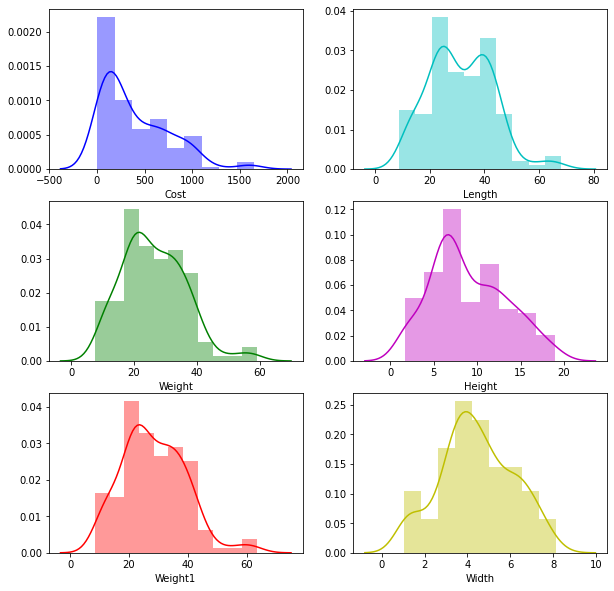

In [8]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']

# defining the plot area into 3 rows and 2 columns with each plot size with 10x10 size.
# sharex=False represents, they don't share the common X axis.
# precisely, every feature's x-axis is independent of itself
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
for i, feature in enumerate(df.columns):
    # displot takes first argument as column name to represent the graph
    # color here is displayed using Array
    # ax specifies the plot block where it needs to get rendered.
    sns.distplot(df[feature] , color=colors[i], ax=axes[i%3, i//3])

Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution.
So, looking at the above Histograms, we observe how the probability density function is for each feature plotted, that explains how each feature is distributed.

## Now we'll check for Outliers

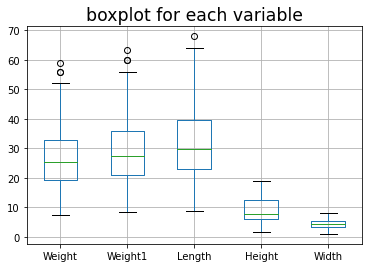

In [9]:
df.iloc[:, 1:].boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

> Looking at the Graph Above, we clearly see that there are outliers in the data we have.
> Outliers are represented with small circles in the graph. 
> In the next snippet, we remove outliers and plot the graph.

- In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

- We will use Z-score function defined in scipy library to detect the outliers.

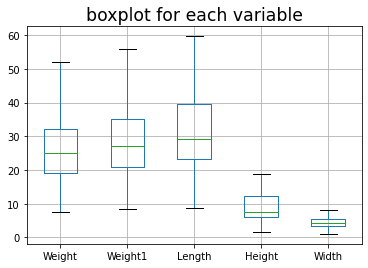

In [10]:
# We are gonna eliminate outliers using z-scores from Scipy library.
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

df.iloc[:, 1:].boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

In [11]:
df.shape

(155, 6)

> Now the data is clear with minor outliers and we are good to go with it.

## Finding Correlation

###### *Variables within a dataset can be related for lots of reasons.*

For example:
- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

##### *It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.*

> So now, we'll find the correlation between the variables we have using pandas' corr method.

In [12]:
df.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.895740,0.899734,0.907373,0.801954,0.924029
Weight,0.895740,1.000000,0.999417,0.990580,0.675500,0.888883
Weight1,0.899734,0.999417,1.000000,0.993026,0.691166,0.895324
Length,0.907373,0.990580,0.993026,1.000000,0.755416,0.896793
Height,0.801954,0.675500,0.691166,0.755416,1.000000,0.800091
Width,0.924029,0.888883,0.895324,0.896793,0.800091,1.000000


**Now We are gonna plot Heatmap for all the features using seaborn library.**

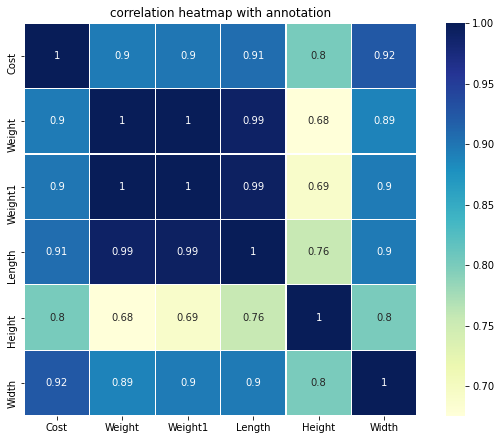

In [13]:
# taking the number of columns in a dataframe
n=df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(df.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("correlation heatmap with annotation")
plt.show()

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

- Positive Correlation: both variables change in the same direction. 
- Neutral Correlation: No relationship in the change of the variables. 
- Negative Correlation: variables change in opposite directions.


So, looking at the heatmap above, the following are the observations.

let's see how the features are related to Cost which is what we are gonna estimate.


- The relation between Cost and Height are 72%
- The relation between Cost and Weight are 92%
- The relation between Cost and Weight1 are 92%
- The relation between Cost and Length are 92%
- The relation between Cost and Width are 89%

**Evaluation Criteria**<br />
- +0.30. A weak uphill (positive) linear relationship
- +0.50. A moderate uphill (positive) relationship
- +0.70. A strong uphill (positive) linear relationship
- Exactly +1. A perfect uphill (positive) linear relationship

So, as almost every feature is in linear relationship to Cost positively. So, we are going to take all the featuers into consideration for implementing the algorithms.